In [20]:
#Loading the required libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the cifar-10 datasets
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape  #50000 samples , Image size 32 by 32 and 3 is for rgb

(50000, 32, 32, 3)

In [3]:
X_test.shape  #10000 samples , Image size 32 by 32 and 3 is for rgb

(10000, 32, 32, 3)

In [4]:
y_train.shape #50000 samples, 1D array-specifying class

(50000, 1)

In [5]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [6]:
y_train[5]

1

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
#defining a function to plot image on that particular index
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index]) #for plotting
    plt.xlabel(classes[y[index]]) #for getting the label

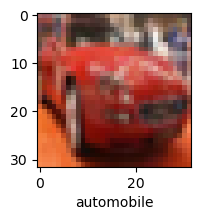

In [9]:
plot_sample(X_train,y_train,5)  

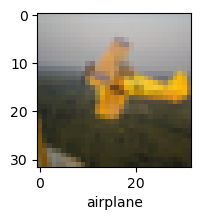

In [10]:
plot_sample(X_train,y_train,1234)

#ANN

In [11]:
#Normalizing the image to get the image in 0-1 range
X_train=X_train/255.0
X_test=X_test/255.0

In [12]:
ann =Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(3000, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [14]:
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 144s 90ms/step - loss: 1.8128 - accuracy: 0.3565
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.6267 - accuracy: 0.4251
Epoch 3/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.5423 - accuracy: 0.4571
Epoch 4/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4837 - accuracy: 0.4787
Epoch 5/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.4361 - accuracy: 0.4962
Epoch 6/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.3915 - accuracy: 0.5102
Epoch 7/10
1563/1563 [==============================] - 120s 76ms/step - loss: 1.3527 - accuracy: 0.5254
Epoch 8/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.3189 - accuracy: 0.5366
Epoch 9/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.2854 - accuracy: 0.5496
Epoch 10/10
1563/1563 [==============================] 

In [15]:
ann.evaluate(X_test,y_test)`

313/313 [==============================] - 6s 17ms/step - loss: 1.3891 - accuracy: 0.5036


[1.3891470432281494, 0.503600001335144]

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred] #to match the sequence with y_test

print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.47      0.55      1000
           1       0.74      0.51      0.60      1000
           2       0.40      0.43      0.41      1000
           3       0.39      0.26      0.31      1000
           4       0.49      0.36      0.41      1000
           5       0.47      0.31      0.37      1000
           6       0.35      0.84      0.50      1000
           7       0.65      0.53      0.59      1000
           8       0.59      0.72      0.65      1000
           9       0.58      0.62      0.60      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.50     10000
weighted avg       0.53      0.50      0.50     10000



#CNN

In [22]:
cnn =Sequential([
        #cnn network
        Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        MaxPooling2D((2,2)),
        Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        MaxPooling2D((2,2)),
        #dense network
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')    
    ])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [26]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 31ms/step - loss: 1.4820 - accuracy: 0.4669
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1384 - accuracy: 0.5982
Epoch 3/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.0144 - accuracy: 0.6456
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9410 - accuracy: 0.6719
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8809 - accuracy: 0.6948
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8273 - accuracy: 0.7139
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7865 - accuracy: 0.7273
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7442 - accuracy: 0.7424
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7082 - accuracy: 0.7545
Epoch 10/10
1563/1563 [==============================] - 50s 32m

In [28]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9075 - accuracy: 0.6961


[0.9075244069099426, 0.6960999965667725]

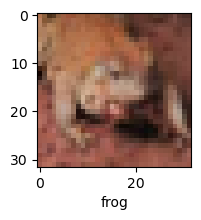

In [30]:
plot_sample(X_test,y_test,5)

In [31]:
y_pred=cnn.predict(X_test)
y_pred[:3]

313/313 [==============================] - 4s 14ms/step


array([[1.5902521e-02, 3.4452063e-05, 2.2355863e-03, 8.8241625e-01,
        1.3938642e-04, 6.3050412e-02, 2.2623539e-03, 1.0636680e-05,
        3.3880685e-02, 6.7810026e-05],
       [9.7839199e-02, 1.8860179e-01, 3.3750033e-04, 6.3801912e-05,
        1.9800867e-05, 1.9558856e-05, 1.5734405e-06, 8.0291202e-06,
        7.0475072e-01, 8.3581302e-03],
       [2.6138052e-01, 6.0945641e-02, 3.1014881e-03, 8.2617709e-03,
        4.6720225e-03, 2.0440163e-03, 8.7979092e-04, 1.2406432e-02,
        4.6359783e-01, 1.8271053e-01]], dtype=float32)

In [38]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1]

In [39]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

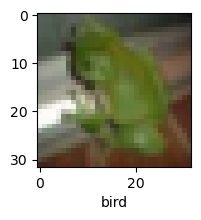

In [42]:
plot_sample(X_test,y_classes,7)  #as we can see from above it s classifying it wrong as the accuracy of model is less

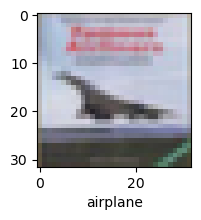

In [43]:
plot_sample(X_test,y_classes,3) # here is classifies it alright

In [44]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.81      0.81      0.81      1000
           2       0.63      0.53      0.58      1000
           3       0.47      0.57      0.52      1000
           4       0.67      0.62      0.65      1000
           5       0.62      0.54      0.58      1000
           6       0.74      0.80      0.77      1000
           7       0.80      0.72      0.76      1000
           8       0.75      0.84      0.79      1000
           9       0.77      0.76      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

